<a href="https://colab.research.google.com/github/duytruong204/Project/blob/main/Harmony_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as geek
import math

In [ ]:
#we're going to sort type according to heal point
#Higher heal point is, nearer type harmony is

#Function

In [ ]:
def find_between(list_1):
  s = complex(0,0)
  for hue_j in list_1:
    x = 0.2 * math.cos(hue_j/180*math.pi)
    y = 0.2 * math.sin(hue_j/180*math.pi)  
    s = s+ complex(x,y)
    out_angle = geek.angle(s, deg = True) 
  return trigonometric(out_angle)

In [ ]:
def find_opposite(hue_j,hue_i):
  x0 = 0.2 * math.cos(hue_j/180*math.pi)
  y0 = 0.2 * math.sin(hue_j/180*math.pi)
  a = math.tan(hue_i/180*math.pi)
  x = 2 * (x0 + a * y0)/(a**2 + 1) - x0
  y = 2 * a* (x0 + a * y0)/(a**2 + 1) - y0
  out_angle = geek.angle(complex(x,y), deg = True) 
  return trigonometric(out_angle)

In [ ]:
def trigonometric(hue):
  if hue > 180:
    hue = hue - 360
  elif hue < -180:
    hue = hue + 360
  return hue
def trigonometric_of_list(list_hue):
  lista = []
  for ele in list_hue:
    ele = trigonometric(ele)
    lista.append(ele)
  return lista
def takehue(real_data):
  x = real_data.values.tolist()
  list_hue = []
  for j in range(len(x)):
    hue = []
    hue.append(eval(x[j][0])[0])
    for k in range(len(eval(x[j][1]))):
      hue.append(eval(x[j][1])[k][0])
    list_hue.append(hue)
  return list_hue
def take_nearest(outsider,List):
  outsider = trigonometric(outsider)
  List = trigonometric_of_list(List)
  dis = []
  bag = []
  for ele in List:
    bag.append(ele)
    dis.append(abs(ele-outsider))
  return bag[my_min(dis)],my_min(dis)
def my_min(List):
  try:
    min = List[0]
  except:
    return None
  for ele in List:
    if ele < min:
      min = ele
  for i in range(len(List)):
    if min == List[i]:
      return i

In [ ]:
def take_unique(list):
  alist = []
  for ele in list:
    if not ele in alist:
      alist.append(ele)
  return alist

In [ ]:
def check_bag(bag):
  for ele in bag:
    if len(ele) == 0:
      return 0
  return 1

In [ ]:
def attack(hue,hue_fake):
  hue_real = hue.copy()
  hue_real = trigonometric_of_list(hue_real)
  damage = 0
  n = len(hue_fake)
  bag = [0]*n
  for i in range(n):
    bag[i] = []
  while len(hue_real) != 0:
    k = take_nearest(trigonometric(hue_real[0]),hue_fake)
    bag[k[1]].append(hue_real[0])
    damage = damage + abs(k[0] - hue_real[0]) 
    del (hue_real[0])
  return damage,check_bag(bag)

In [ ]:
#need to filter
#(0-180]:analogous,complementary
#(180-360]:triad,square, Double split Complementary,Split complementary,analogous

#Triad

In [ ]:
def triad(hue):
  crit = 360
  hue = trigonometric_of_list(hue)
  for hue_i in hue:
    #create fake hue
    hue_i = trigonometric(hue_i)
    hue_k = trigonometric(hue_i + 120)
    hue_h = trigonometric(hue_i + 240)
    hue_fake = [hue_i,hue_k,hue_h]
    x = attack(hue,hue_fake)
    if x[1] == 0:
      if crit < 360:
        continue
      else:
        crit = 360
        continue
    else:
      if crit > x[0]:
        crit = x[0]
  return crit,hue_fake

In [ ]:
hue = [0,117,237]
t = time.time()
print(f'error = {triad(hue)}')
print(f'Runtime: {time.time() - t}')

error = 3
Runtime: 0.0012445449829101562


#square

In [ ]:
def square(hue):
  hue = trigonometric_of_list(hue)
  crit = 360
  for hue_i in hue:
    #create fake hue
    hue_i = trigonometric(hue_i)
    hue_k = trigonometric(hue_i + 90)
    hue_h = trigonometric(hue_i + 180)
    hue_g = trigonometric(hue_i + 270)
    hue_fake = [hue_i,hue_k,hue_h,hue_g]
    x = (attack(hue,hue_fake))
    if x[1] == 0:
      if crit < 360:
        continue
      else:
        crit = 360
        continue
    else:
      if crit > x[0]:
        crit = x[0]
  return crit, hue_fake

In [ ]:
hue = [90,180,0,0]
t = time.time()
print(f'error = {square(hue)}')
print(f'Runtime: {time.time() - t}')

error = 360
Runtime: 0.0013818740844726562


#Analogous(uncompleted)

In [ ]:
def analogous(hue):
  #create a fake hue
  crit = 360
  hue = trigonometric_of_list(hue)
  hue.sort()
  hue = take_unique(hue)
  for i in range(5):
    if i == 5:
      hua_fake = [hue[0],hue[-1],hue[0] + (hue[-1] - hue[0])/2,hue[0]+(hue[-1]+hue[0])/4,hue[0] + (hue[-1]+hue[0])/2+(hue[-1]+hue[0])/4]
    elif i == 3:
      hua_fake = [hue[0],hue[-1],(hue[-1]+hue[0])/2]
    elif i == 4:
      hua_fake = [hue[0],hue[-1],hue[0]+(hue[-1]-hue[0])/3,hue[0]+(hue[-1]-hue[0])/3*2]
    else:
      continue
    x = (attack(hue,hua_fake))
    if x[1] == 0:
      if crit < 360:
        a = 0
      else:
        crit = 360
        a = 0
    else:
      if crit > x[0]:
        crit = x[0]
  return crit

In [ ]:
hue = [24, 2, 354, 14, 342, 32]
t = time.time()
print(f'error = {analogous(hue)}')
print(f'Runtime: {time.time() - t}')

error = 17.333333333333336
Runtime: 0.0015950202941894531


#Complementary(Complementary,Split complementary, Double split Complementary)

##Complementary

In [ ]:
def Complementary(hue):
  hue = trigonometric_of_list(hue)
  crit = 360
  heal = 360
  for hue_i in hue:
    #create fake hue
    heal = 360
    hue_i = trigonometric(hue_i)
    hue_k = trigonometric(hue_i + 180)
    hue_fake = [hue_i,hue_k]
    x = (attack(hue,hue_fake))
    if x[1] == 0:
      if crit < 360:
        continue
      else:
        crit = 360
        continue
    else:
      if crit > x[0]:
        crit = x[0]
  return crit, hue_fake

In [ ]:
hue = [0, 9, 358, 24, 18, 204]
t = time.time()
print(f'error = {Complementary(hue)}')
print(f'Runtime: {time.time() - t}')

error = 59
Runtime: 0.0013303756713867188


##Split Complementary

In [ ]:
def Split_Complementary(hue):
  hue = trigonometric_of_list(hue)
  crit = 360
  hue.sort()
  hue_i = sum(hue)/len(hue)
  for hue_k in hue:
    if hue_k != hue_i:
      #create fake hue
      heal = 360
      hue_fake = [find_opposite(hue_k,hue_i),hue_i,hue_k]
      x = (attack(hue,hue_fake))
      if x[1] == 0:
        if crit < 360:
          continue
        else:
          crit = 360
          continue
      else:
        if crit > x[0]:
          crit = x[0]
  return crit

In [ ]:
hue = [24, 2, 354, 14, 342, 32]
t = time.time()
print(f'error = {Split_Complementary(hue)}')
print(f'Runtime: {time.time() - t}')

error = 32.0
Runtime: 0.003252267837524414


##Double split complementary

In [ ]:
def Double_Split_Complementary(hue_real):
  hue_real = trigonometric_of_list(hue_real)
  hue = hue_real
  hue.sort()
  hue_real.sort()
  crit = 360
  for hue_i in hue:
    hue_op_i = trigonometric(hue_i+180)
    for hue_k in hue:
      if hue_k != hue_i:
        hue_op_k = trigonometric(hue_k+180)
        myList = [hue_i,hue_op_i,hue_k,hue_op_k]
        myList.sort()
        list_outsider = [(myList[0]+myList[1])/2,
                        (myList[1]+myList[2])/2,
                        (myList[2]+myList[3])/2,
                        (myList[3]+myList[0])/2,]
        for hue_g in list_outsider:
          hue_fake = [hue_op_i,hue_op_k,hue_i,hue_k,hue_g]
          hue_fake.sort()
          x = attack(hue_real,hue_fake)
          if x[1] == 0:
            if crit < 360:
              continue
            else:
              crit = 360
              continue
          else:
            if crit > x[0]:
              crit = x[0] 

        hue_fake = [hue_op_i,hue_op_k,hue_i,hue_k]
        hue_fake.sort()
        x = attack(hue_real,hue_fake)
        if x[1] == 0:
          if crit < 360:
            continue
          else:
            crit = 360
            continue
        else:
          if crit > x[0]:
            crit = x[0] 
  return crit, hue_fake

In [ ]:
hue = [0, 9, 358, 24, 18, 204]
t = time.time()
print(f'error = {Double_Split_Complementary(hue)}')
print(f'Runtime: {time.time() - t}')

error = 360
Runtime: 0.011251449584960938


#Brise fan

In [ ]:
def Brise_fan(hue):
  #create a fake hue
  crit = 360
  heal = 360
  hue = trigonometric_of_list(hue)
  hue.sort()
  for hue_i in hue:
    for hue_j in hue:
      for hue_k in hue:
        hua_fake = [hue_i,hue_j,hue_k]
        if len(hua_fake) == 0:
          return 0
        x = (attack(hue,hua_fake))
        if x[1] == 0:
          if crit < 360:
            a = 0
          else:
            crit = 360
            a = 0
        else:
          if crit > x[0]:
            crit = x[0]
  if heal - crit == 360:
    return 360
  return crit  

#Monotone  

In [ ]:
def mono(hue):
  #create a fake hue
  crit = 360
  heal = 360
  hue = trigonometric_of_list(hue)
  for hue_i in hue:
    hua_fake = [hue_i]
    if len(hua_fake) == 0:
      return 0
    x = (attack(hue,hua_fake))
    if x[1] == 0:
      if crit < 360:
        a = 0
      else:
        crit = 360
        a = 0
    else:
      if crit > x[0]:
        crit = x[0]
  return crit  

In [ ]:
hue = [0, 180, 0]
t = time.time()
print(f'error = {mono(hue)}')
print(f'Runtime: {time.time() - t}')

error = 180
Runtime: 0.0015795230865478516


#Main

In [ ]:
data = pd.read_csv("/content/ecommerce.csv")

In [ ]:
data

,Primary,Secondary,Palette type
0,"(190, 67, 75)","[(236, 70, 74), (215, 66, 74), (209, 69, 76), ...",Colorful
1,"(16, 37, 68)","[(207, 24, 50), (22, 22, 56), (9, 39, 68), (22...",Colorful
2,"(260, 65, 82)","[(164, 64, 81), (214, 65, 82), (6, 65, 82), (1...",Colorful
3,"(27, 91, 61)","[(33, 100, 72), (33, 100, 72)]",Colorful
4,"(231, 100, 72)","[(209, 100, 92), (209, 100, 92)]",Colorful
...,...,...,...
843,"(18, 87, 88)","[(49, 86, 89), (32, 86, 86), (15, 90, 88), (15...",Colorful
844,"(11, 65, 63)","[(17, 61, 61), (5, 66, 63), (17, 61, 61), (5, ...",Colorful
845,"(24, 75, 81)","[(2, 75, 81), (354, 74, 81), (14, 75, 81), (34...",Colorful
846,"(36, 71, 73)","[(10, 71, 72), (5, 71, 73), (17, 69, 74), (30,...",Colorful


In [ ]:
data = data.loc[data['Primary'] != '[]'].loc[data['Secondary'] != '[]']
data

,Primary,Secondary,Palette type
0,"(190, 67, 75)","[(236, 70, 74), (215, 66, 74), (209, 69, 76), ...",Colorful
1,"(16, 37, 68)","[(207, 24, 50), (22, 22, 56), (9, 39, 68), (22...",Colorful
2,"(260, 65, 82)","[(164, 64, 81), (214, 65, 82), (6, 65, 82), (1...",Colorful
3,"(27, 91, 61)","[(33, 100, 72), (33, 100, 72)]",Colorful
4,"(231, 100, 72)","[(209, 100, 92), (209, 100, 92)]",Colorful
...,...,...,...
843,"(18, 87, 88)","[(49, 86, 89), (32, 86, 86), (15, 90, 88), (15...",Colorful
844,"(11, 65, 63)","[(17, 61, 61), (5, 66, 63), (17, 61, 61), (5, ...",Colorful
845,"(24, 75, 81)","[(2, 75, 81), (354, 74, 81), (14, 75, 81), (34...",Colorful
846,"(36, 71, 73)","[(10, 71, 72), (5, 71, 73), (17, 69, 74), (30,...",Colorful


In [ ]:
x = takehue(data)

In [ ]:
list_r = []
for i  in range(len(x)):
  list_r.append(min(triad(x[i])[0],square(x[i])[0],analogous(x[i]),Complementary(x[i]),
    Split_Complementary(x[i]),Double_Split_Complementary(x[i]),
    mono(x[i])))
  
list_type = []
for i in range(len(x)):
  if list_r[i] == triad(x[i])[0]:
    list_type.append("Triad")
  elif list_r[i] == square(x[i])[0]:
    list_type.append("Square")
  elif list_r[i] == analogous(x[i]) and list_r[i] < 50:
    list_type.append("Analogous")
  elif list_r[i] == Complementary(x[i])[0]:
    list_type.append("Complementary")
  elif list_r[i] == Split_Complementary(x[i]):
    list_type.append("Split Complementary")
  elif list_r[i] == Double_Split_Complementary(x[i]):
    list_type.append("Double Split Complementary")
  elif list_r[i] == mono(x[i]):
    list_type.append("None")
  else:
    list_type.append("Brise fan")

In [ ]:
data['harmony'] = list_type

In [ ]:
data['Error'] = list_r

In [ ]:
data

,Primary,Secondary,Palette type,harmony,Error
0,"(190, 67, 75)","[(236, 70, 74), (215, 66, 74), (209, 69, 76), ...",Colorful,Complementary,113.000000
1,"(16, 37, 68)","[(207, 24, 50), (22, 22, 56), (9, 39, 68), (22...",Colorful,Complementary,69.000000
2,"(260, 65, 82)","[(164, 64, 81), (214, 65, 82), (6, 65, 82), (1...",Colorful,Double Split Complementary,57.000000
3,"(27, 91, 61)","[(33, 100, 72), (33, 100, 72)]",Colorful,None,6.000000
4,"(231, 100, 72)","[(209, 100, 92), (209, 100, 92)]",Colorful,None,22.000000
...,...,...,...,...,...
809,"(18, 87, 88)","[(49, 86, 89), (32, 86, 86), (15, 90, 88), (15...",Colorful,Brise fan,120.000000
810,"(11, 65, 63)","[(17, 61, 61), (5, 66, 63), (17, 61, 61), (5, ...",Colorful,Analogous,0.000000
811,"(24, 75, 81)","[(2, 75, 81), (354, 74, 81), (14, 75, 81), (34...",Colorful,Analogous,17.333333
812,"(36, 71, 73)","[(10, 71, 72), (5, 71, 73), (17, 69, 74), (30,...",Colorful,Split Complementary,19.000000


In [ ]:
data.reset_index(inplace = True, drop = True)

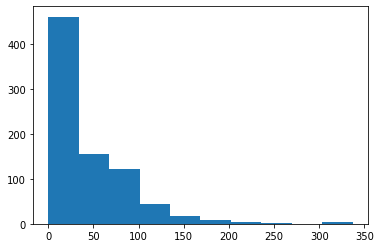

In [ ]:
y = data.iloc[:,[4]].values
plt.hist(y)
plt.show()

In [ ]:
pd.crosstab(index=data['harmony'], columns='count')

col_0,count
harmony,
Analogous,349
Brise fan,69
Complementary,151
Double Split Complementary,86
None,92
Split Complementary,57
Square,1
Triad,9


In [ ]:
data.loc[data['harmony'] == 'Analogous']

,Primary,Secondary,Palette type,harmony,Error
6,"(217, 48, 75)","[(210, 48, 75), (223, 48, 75), (204, 42, 72)]",Colorful,Analogous,0.666667
11,"(254, 81, 58)","[(260, 100, 79), (275, 100, 90), (260, 100, 79...",Colorful,Analogous,4.500000
13,"(5, 100, 73)","[(356, 100, 73), (359, 100, 73), (347, 54, 62)...",Colorful,Analogous,11.000000
14,"(4, 29, 39)","[(61, 29, 39), (15, 27, 41), (23, 29, 39), (79...",Colorful,Analogous,27.000000
15,"(27, 80, 60)","[(33, 72, 69), (44, 100, 81), (40, 100, 81), (...",Colorful,Analogous,10.000000
...,...,...,...,...,...
805,"(27, 33, 67)","[(20, 38, 64), (6, 64, 49), (15, 21, 46), (37,...",Colorful,Analogous,16.000000
807,"(23, 75, 81)","[(318, 91, 62), (338, 79, 45), (30, 73, 81), (...",Colorful,Analogous,47.000000
810,"(11, 65, 63)","[(17, 61, 61), (5, 66, 63), (17, 61, 61), (5, ...",Colorful,Analogous,0.000000
811,"(24, 75, 81)","[(2, 75, 81), (354, 74, 81), (14, 75, 81), (34...",Colorful,Analogous,17.333333


List:[15, 195, 190, 201, 7, 21]
Harmony rule = Double Split Complementary
error = 8.5


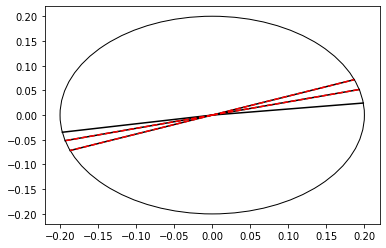

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math 

j = 808

print(f'List:{x[j]}')
print(f'Harmony rule = {data.iloc[[j],[3]].values[0][0]}')
print(f'error = {data.iloc[[j],[4]].values[0][0]}')
for i in range(len(x[j])):
  x1, y1 = [0, 0.2*math.cos(x[j][i]/180*math.pi)], [0, 0.2*math.sin(x[j][i]/180*math.pi)]               
  plt.plot(x1, y1, color='black')

circle1 = plt.Circle((0, 0), 0.2, color='black', fill=False)
plt.gca().add_patch(circle1 )

m = Double_Split_Complementary(x[j])[1]
for i in range(len(m)):
  x1, y1 = [0, 0.2*math.cos(m[i]/180*math.pi)], [0, 0.2*math.sin(m[i]/180*math.pi)]               
  plt.plot(x1, y1, color = 'red',  linestyle='--')

plt.show()